# Linear Models

## Recap
In Lecture 3 you discussed **classic** machine learning models. Specifically, these models are resticrted to be linearly parametrized, given by
$$f_\boldsymbol{\theta}=\sigma(\boldsymbol{w}^T\boldsymbol{x}+b),$$
where the fixed mapping $\sigma$ is the identitly, sign, and sigmoid for the linear regression, linear classification, and logistic regression, respectivly.


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Random seed
seed = 100
np.random.seed(seed)
random.seed(seed)

# Linear Regression via Least Squares
Given a dataset $\mathcal{D}=\{\boldsymbol{x}_t, \boldsymbol{s}_t\}_{t=1}^{n_t}$ the optimal parameters given by the Least Squares solution are
$$\boldsymbol{\theta}^*=(\boldsymbol{X}^T\boldsymbol{X})^{-1}\boldsymbol{X}^T\boldsymbol{s}.$$

## Data Generation
To make things tractable and simple to visualize, we consider the fitting of a linear function to data taken from a noisy linear setup.
Mathematically speaking, our data is generated from the following relationship:
\begin{equation}
s_t = \alpha \cdot x_t + n_t,
\end{equation}
where the input $x_t$ is uniformly distributed over $[0,1]$, and $n_t$ is additive Gaussian noise with mean value $\mu$ and variance $\sigma^2$.

In [ ]:
data_size = 100
alpha = 1.8
mu = 1
sigma = 1
# Creating the synthetic data set
x_train = np.random.rand(data_size, 1)
s_train = alpha * x_train + sigma*np.random.randn(data_size, 1) + mu

Let's see what this data looks like:



Text(0, 0.5, '$s$ (label)')

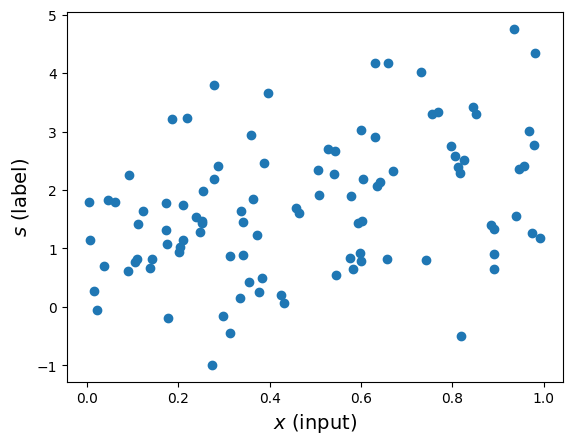

In [ ]:
plt.scatter(x_train, s_train)

plt.xlabel("$x$ (input)", fontsize=14)
plt.ylabel("$s$ (label)", rotation=90, fontsize=14)

In [ ]:
# Least Squares solution
X = np.hstack([x_train, np.ones_like(x_train)])
print(X.shape)
theta_star = np.dot(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), s_train)
w, b = theta_star[0], theta_star[1]
print(w, b)

(100, 2)
[1.52465211] [0.98485975]


Let's see what the model learned look like:

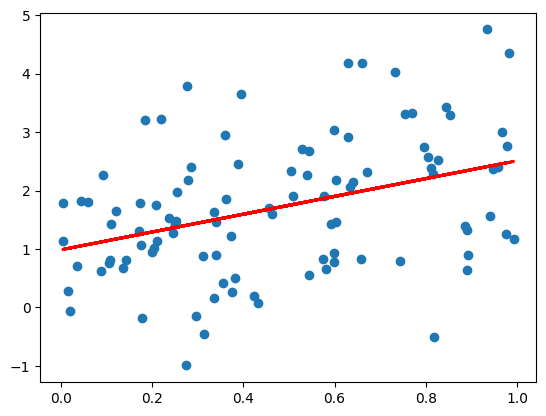

In [ ]:
# Compute model outputs
s_hat = w*x_train + b
# Visulize fitting of data
plt.scatter(x_train,s_train)
plt.plot(x_train,s_hat, c= "red", linewidth=2)

# Linear Classification via (hard) SVM





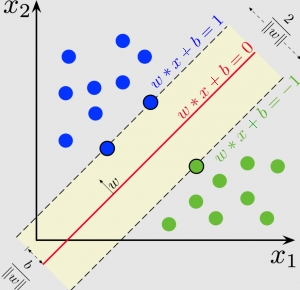

As learned in class, SVMs aim at finding linear classifiers by seeking to maximize their **margins**, i.e., the minimal distance between the data points and the dividing hyperplane. Specifically, hard SVM solves
$$\underset{\tilde{\boldsymbol{w}},\tilde{b}}{\arg\min}\|\tilde{\boldsymbol{w}}\|,\quad \text{subject to } \boldsymbol{s}_t(\tilde{\boldsymbol{w}}^T\boldsymbol{x}_t+\tilde{b})\geq1 \quad \forall t \in 1, \dots, n_t.$$
Recall that a linear classifier learning assumes that the data points **can be indeed divided into halfspaces**. Let us gaurentee that first, for the dataset used previously.

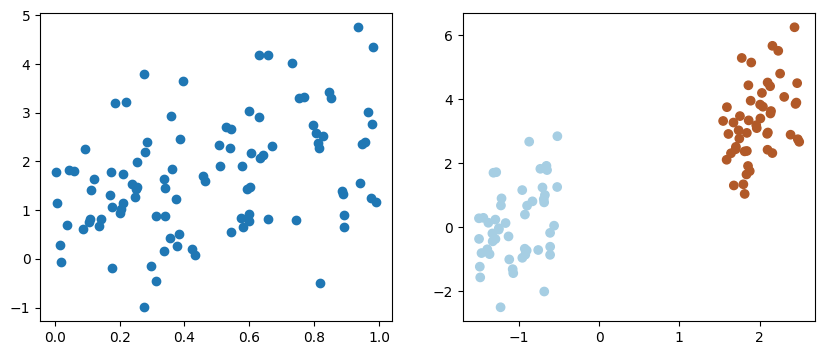

In [ ]:
group_size = data_size // 2
X = np.hstack([x_train, s_train])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1])

X[:group_size, :] -= [1.5, 1.5]
X[group_size:, :] += [1.5, 1.5]
y = [-1] * group_size + [1] * group_size

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

In contrast with linear resgression, that is given in a closed form manner by the Least Squares solution, linear classification and logistic regression are based on iterative optimizers. While there are various teqnuiqes implemting iterative optimizers, such as first-order (gradient) methods, we will aid those used in `sklearn`; which is a python library implementing machine learning models and statistical modelling. For SVM, sklearn optimization is based on [libsvm](https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf). The source for the following code can be found [here](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html).

In [ ]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

SVC(kernel='linear')

Solving SVM, we are now have excess to `clf.coef_` and `clf.intercept_`, storing $\tilde{\boldsymbol{w}}$ and $\tilde{b}$, respectivly, which define the seperating hyperpalne, i.e, $\tilde{\boldsymbol{w}}^T\boldsymbol{x}+\tilde{b}=0$. As we consider a 2D example, this is a line, given by:
$$\tilde{w}_1x_1 + \tilde{w}_2x_2 + \tilde{b} = 0 \implies
x_2 = -\frac{\tilde{w}_1}{\tilde{w}_2}x_1 - \frac{\tilde{b}}{\tilde{w}_2}$$

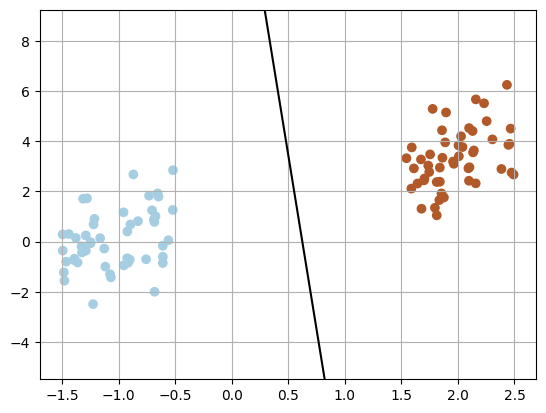

In [ ]:
# get the separating hyperplane
w, b = clf.coef_[0], clf.intercept_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - b / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.plot(xx, yy, "k-")
plt.ylim(X[:, 1].min() - 3, X[:, 1].max() + 3)
plt.grid()

## The margin
Now, let us plot the parallels to the separating hyperplane that pass through the
support vectors. This lines are perpendicular to the hyperplane, located margin away from it. For the 2D case, using Lemma 3.1. from Lecture 3, we have
$$
\tilde{w}_1x_1 + \tilde{w}_2x_2 + \tilde{b} = 0 \implies
x_2 = -\frac{\tilde{w}_1}{\tilde{w}_2}x_1 - \frac{\tilde{b}}{\tilde{w}_2} \\
\tilde{\boldsymbol{w}}^T\boldsymbol{x}+\tilde{b}=1 \implies
x_2 = -\frac{\tilde{w}_1}{\tilde{w}_2}x_1 - \frac{\tilde{b}}{\tilde{w}_2} + \frac{1}{\tilde{w}_2} \\
\tilde{\boldsymbol{w}}^T\boldsymbol{x}+\tilde{b}=-1 \implies
x_2 = -\frac{\tilde{w}_1}{\tilde{w}_2}x_1 - \frac{\tilde{b}}{\tilde{w}_2} - \frac{1}{\tilde{w}_2}
$$

<!-- stating that
$$d(\boldsymbol{x}, \mathcal{H}_\boldsymbol{\theta})=\frac{|\boldsymbol{w}^T\boldsymbol{x}+b|}{\|\boldsymbol{w}\|},$$
this is $1/\|\boldsymbol{w}\|$ away vertically. -->

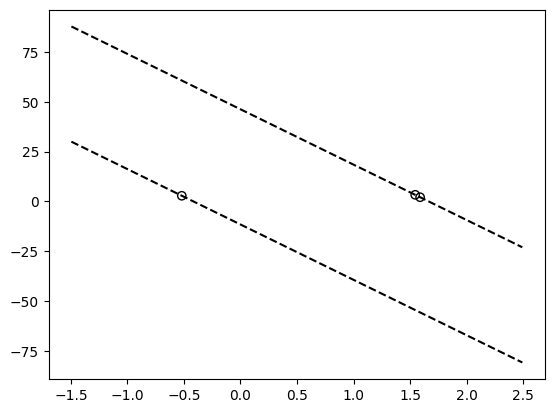

In [ ]:
# the parallels
yy_up = yy + 1 / w[1]
yy_down = yy - 1 / w[1]
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

# the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors="none", edgecolors="k")


(-3.493818790547711, 7.25570750698612)

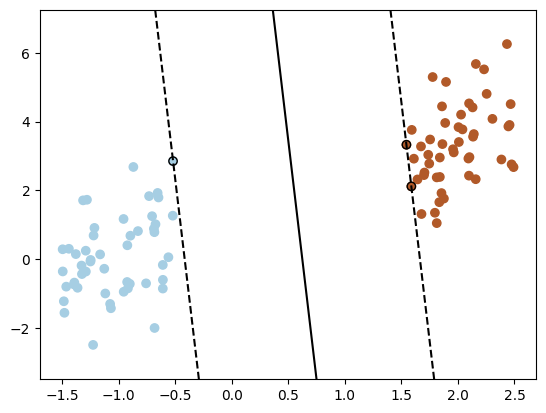

In [ ]:
# altogether
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors="none", edgecolors="k")
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

# Logistic Regression
Logistic regression solves binary detection using a linear model which produces **probabilistic** estimates. It does so by finding the weight $\boldsymbol{w}$ that correspond to the maximum LLF (log-likelihood-function).

These weights define the logit $f_\boldsymbol{\theta}(\boldsymbol{x}) = \boldsymbol{\theta}^T\boldsymbol{x}'$, which is the dashed black line. They also define the predicted probability using the logistic regressor (sigmoid function), $p(\boldsymbol{x}) = 1 / (1 + e^{−f_\boldsymbol{\theta}(\boldsymbol{x})})$, shown here as the full black line. In this case, the threshold $p(\boldsymbol{x}) = 0.5$ and $f_\boldsymbol{\theta}(\boldsymbol{x}) = 0$ corresponds to the value of $\boldsymbol{x}$ slightly higher than 3. This value is the limit between the inputs with the predicted outputs of 0 and 1.


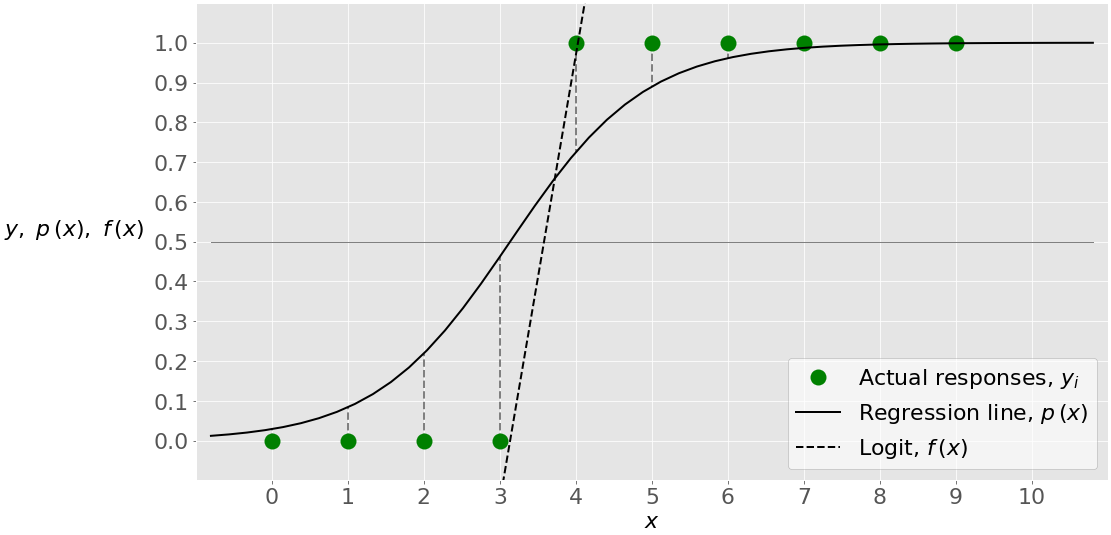

We will examplify *single-variate logistic regression*, which is the most straightforward case of logistic regression. There is only one independent variable (or feature) $\boldsymbol{x}=x$. The source for the following code can be found [here](https://https://realpython.com/logistic-regression-python/).

LogisticRegression()

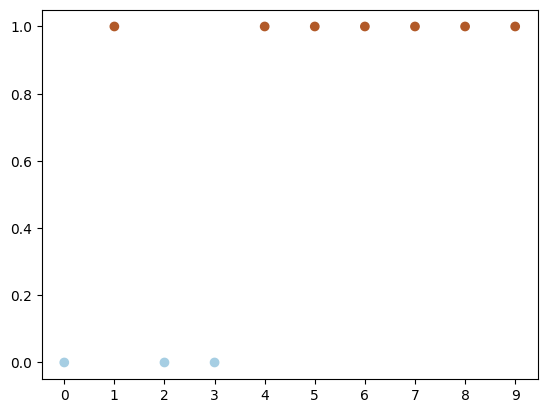

In [ ]:
# Step 1: Import packages, functions, and classes
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

# Step 2: Get data
X = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
plt.scatter(X.ravel(), y, c=y, cmap=plt.cm.Paired)
plt.xticks(np.arange(10))

# Step 3: Create a model and train it
clf = LogisticRegression() # defualt solver is lbfgs
clf.fit(X, y)

In [ ]:
# Step 4: Make predections using the model
p_pred = clf.predict_proba(X)
y_pred = clf.predict(X)
print(p_pred)
print(f'true labels are: {y}')
print(f'predictions are: {y_pred}')

[[0.82342602 0.17657398]
 [0.70490444 0.29509556]
 [0.55027758 0.44972242]
 [0.38528429 0.61471571]
 [0.24302808 0.75697192]
 [0.14122896 0.85877104]
 [0.0776946  0.9223054 ]
 [0.04136555 0.95863445]
 [0.02162523 0.97837477]
 [0.0111953  0.9888047 ]]
true labels are: [0 1 0 0 1 1 1 1 1 1]
predictions are: [0 0 0 1 1 1 1 1 1 1]


In this case, the score (or accuracy) is 0.8. There are 2 observations classified incorrectly. The figure below illustrates this example with 8 correct and 2 incorrect predictions:



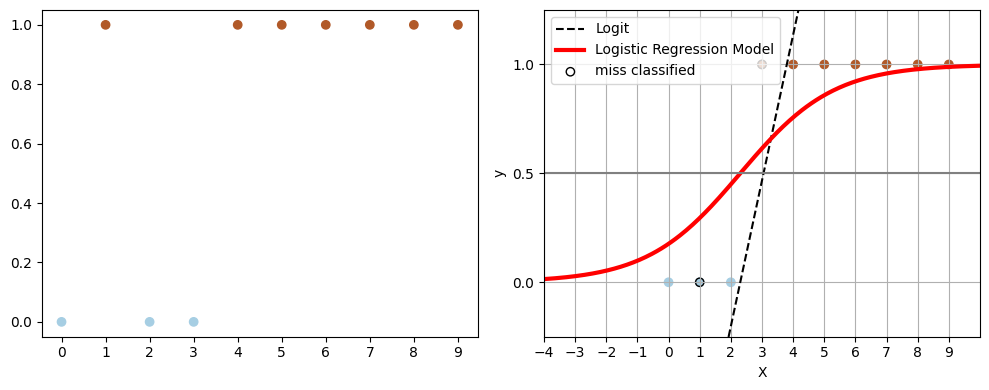

In [ ]:
plt.figure(1, figsize=(10, 4))
plt.subplot(1,2,1)
# true data
plt.scatter(X.ravel(), y, c=y, cmap=plt.cm.Paired)
plt.xticks(np.arange(10))

plt.subplot(1,2,2)
# predicted data
plt.scatter(X.ravel(), y_pred, c=y_pred, cmap=plt.cm.Paired)


X_test = np.linspace(-5, 10, 300)
logit = (X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, logit, "k--", label="Logit")

# Logistic Regression Model
regressor = expit(logit) #1/(1+np.exp(-logit))
plt.plot(X_test, regressor, color="red", linewidth=3, label="Logistic Regression Model")

# mark the mistaken predictions
plt.scatter(X.ravel()[y != y_pred], y_pred[y != y_pred], facecolors="none", edgecolors="k", label="miss classified")

plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.tight_layout()
plt.legend()
plt.grid()

This figure reveals two important characteristic of this example:



1.   Tou cannot draw a regression curve to separate the observations with $y=0$ and those with $y=1$. There is no such a line. Keep in mind that logistic regression is essentially a linear classifier, so you theoretically can’t make a logistic regression model with an accuracy of 1 in this case.
2.   This broblem reveals the strength of the logistic regressor over the SVM techniqe. While SVM provides no information regarding the fidality of its predictions, here the labels of the three mistakenly classified points are accociated with probability closer to 0.5 compared to the correcltly clssified points.

